# Correlates of War: National Material Capabilities Analysis
## Mouhamed Mbengue
## University Of Rochester
## mmbengue@u.rochester.edu

This notebook analyzes the National Material Capabilities (NMC) dataset from the Correlates of War. Here, I will explore the dataset structure, analyze key variables, and investigate relationships between national capabilities and potential conflict patterns.


## 📂 PART I – DATASET & DOCUMENTATION (20 points)


### Q1: Introduction to the Correlates of War Project

The academic work of the Correlates of War project seeks to understand the characteristics and triggers of war by meticulously gathering data. Started in 1963 by political scientist J. David Singer, then at the University of Michigan, COW, has assisted in the creation of more analytical methodologies for the study of international relations. COW's data collection on state interactions, armed forces, and conflicts, starting in 1816, is unique. Few databases allow such detailed analysis of international relations in the context of war, peace, and power.

#### Who publishes the COW datasets?
An academic consortium publishes the Correlates of War datasets. Unlike commercial resources, this is an interdisciplinary project maintained by scholars and institutions. The data is freely available for academic and research purposes, requiring only proper citation.

#### Who are the people and institutions involved?
The author of the project’s founding was J. David Singer from the University of Michigan. In the course of time, he, together with his other colleagues, had moved to other places, like Pennsylvania State University, led by Stuart A. Bremer. In the most up to date information, the project is still together with Jeff Carter from Appalachian State University and Scott Wolford from the University of Texas. The other is D. Scott Bennett from Pennsylvania State University, who is working as the associate director.

#### What datasets are developed by this project?
The COW project has developed several key datasets:

1. **State System Membership**: Records which political entities qualify as sovereign states in the international system since 1816.

2. **Interstate Wars**: Documents wars fought between states, including participants, duration, casualties, and outcomes.

3. **Civil Wars**: Catalogs internal conflicts within states that meet certain thresholds of violence and organization.

4. **Militarized Interstate Disputes (MIDs)**: Tracks incidents where states threaten, display, or use force against other states, even if they don't escalate to full-scale war.

5. **National Material Capabilities**: Measures six indicators of national power (military personnel, military expenditure, iron and steel production, energy consumption, total population, and urban population) to assess state capabilities.

6. **Diplomatic Exchange**: Records diplomatic representation between states as an indicator of diplomatic relations.

7. **Trade and Alliance Data**: Documents formal alliances and trade flows between countries over time.

These datasets collectively provide researchers with comprehensive quantitative data to analyze patterns of conflict, cooperation, and power dynamics in the international system.



### Q2: National Material Capabilities Dataset Version Information

The Correlates of War (COW) National Material Capabilities data has gone through several versions. Version 5.0 (which I am using in this notebook) expanded the data up to 2012 and provided enhanced documentation of data sources. However, it is not the most recent version. Version 6.0 has since been released, which extends the series through 2016 and includes supplemental files and updated metadata. Earlier versions like v4.0 ended in 2007. As such, although v5.0 is quite useful and contains what is required for this lab, some later observations (2013–2016) are captured in v6.0 but not in v5.0.

#### Version Comparison

| Version | Coverage Period | Key Updates |
|---------|----------------|-------------|
| v4.0    | 1816-2007      | Introduced consolidated subcomponent data points in .csv format, more convenient file structure |
| v5.0    | 1816-2012      | Extended coverage to 2012, added additional documentation of data sources |
| v6.0    | 1816-2016      | Extended coverage to 2016, updated supplemental data and documentation |

#### Supplementary Dataset Information

The supplementary dataset for v5.0 of the National Material Capabilities provides supporting documentation and metadata for the six existing indicators (military expenditure, military personnel, iron and steel production, energy consumption, total population, and urban population). Specifically, it includes:

- Country codes and identifiers to link cases consistently across time.

- Data sources and citations for each variable (e.g., UN, World Bank, archival statistics).

- Measurement notes and unit definitions to clarify how the six indicators were collected or estimated.

- Adjustments and interpolations applied when direct data was unavailable.

This supplementary information helps researchers understand data provenance and limitations, but it does not add new subcomponents like defense spending categories or energy by type.

The data for the National Material Capabilities dataset was collected from multiple sources:
- Government records and official publications
- International organizations (UN, World Bank, etc.)
- Historical archives and academic compilations
- National statistical agencies

This diversity of sources creates several challenges for causal and predictive studies:

1. **Inconsistent Collection Methods**: Different countries use different definitions and collection strategies, especially for military data can cause problems in data collection or cleaning.
2. **Reporting Biases**: Countries may strategically misreport capabilities or data for political or security reasons.
3. **Historical Data Reliability**: Older data (especially pre-1945) often relies on estimates and reconstructions rather than direct measurements.
4. **Changing Variable Meanings**: The meaning of variables like "military expenditure" has evolved as warfare technology changed throughout time.
5. **Temporal Discontinuities**: Political changes (e.g., state formation, dissolution) create breaks in time series data.

These issues make it difficult to establish clear causal relationships or make reliable predictions, especially for long-term analyses. Researchers and data scientists must be cautious about drawing strong causal inferences without accounting for these data limitations and potential biases.

#### Implications of Using v5.0

* Using v5.0 limits our most recent data to 2012. If we were interested in understanding very recent trends, such as post 2012 event, we might be missing data from using just v5.0.



## SetUp Data

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


In [4]:
# load the dataset
file_path = 'NMC_5_0.csv'
nmc_data = pd.read_csv(file_path)

# display column names
print("Column names:")
print(nmc_data.columns.tolist())


Column names:
['stateabb', 'ccode', 'year', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc', 'version']


In [5]:
# display first few rows of the dataset test
print("Sample data:")
nmc_data.head()


Sample data:


,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816,3823,17,80,254,8659.0,101.0,0.039697,2011
1,USA,2,1817,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820,1556,15,110,303,9618.0,124.0,0.037087,2011


### -9 Missing Data

In [6]:
# check for -9 values which represent missing data
missing_counts = {}
for col in nmc_data.columns:
    if col not in ['stateabb', 'ccode', 'year', 'version']:
        missing_counts[col] = (nmc_data[col] == -9).sum()

print("Number of missing values (-9) by column:")
for col, count in missing_counts.items():
    print(f"{col}: {count}")


Number of missing values (-9) by column:
milex: 2065
milper: 418
irst: 26
pec: 466
tpop: 0
upop: 68
cinc: 0


In [7]:
# identify unique countries and years in the dataset
unique_countries = nmc_data['stateabb'].nunique()
unique_country_codes = nmc_data['ccode'].nunique()
unique_years = nmc_data['year'].nunique()
year_range = f"{nmc_data['year'].min()} to {nmc_data['year'].max()}"

print(f"Number of unique countries: {unique_countries}")
print(f"Number of unique country codes: {unique_country_codes}")
print(f"Number of unique years: {unique_years}")
print(f"Year range: {year_range}")


Number of unique countries: 217
Number of unique country codes: 217
Number of unique years: 197
Year range: 1816 to 2012


### Dataset Structure

The National Material Capabilities (NMC) dataset is a strong collection of data on the material power resources of countries from 1816 to 2012. The dataset includes the following key components:

1. **Country identifiers**: 
   - `stateabb`: Country abbreviation
   - `ccode`: Numeric country code
   - `state`: Full country name

2. **Temporal index**:
   - `year`: Year of observation

3. **Material capability indicators**:
   - Six primary indicators of national capability
   - One composite index (CINC) derived from the six indicators

4. **Data quality**:
   - Missing values are represented by `-9`
   - The dataset spans nearly 200 years of observations

This dataset is widely used in international relations research to measure the relative power of states in the international system and to study how power dynamics relate to conflict, cooperation, and other international phenomena.


In [8]:
# calculate summary statistics for each variable
# first replace -9 values with NaN for proper statistical calculations
data_clean = nmc_data.copy()
for col in ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']:
    data_clean[col] = data_clean[col].replace(-9, np.nan)

# get summary statistics
summary_stats = data_clean[['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']].describe()
summary_stats


,milex,milper,irst,pec,tpop,upop,cinc
count,1.310600e+04,14753.000000,15145.000000,1.470500e+04,1.517100e+04,15103.000000,1.517100e+04
mean,2.997100e+06,163.311259,3217.474348,5.086410e+04,2.656595e+04,5041.807233,1.330652e-02
std,2.224349e+07,523.027598,18148.900146,2.348559e+05,9.311400e+04,20284.213348,3.718941e-02
min,0.000000e+00,0.000000,0.000000,0.000000e+00,9.000000e+00,0.000000,2.440000e-07
25%,5.348000e+03,6.000000,0.000000,1.020000e+02,1.905000e+03,117.000000,4.517000e-04
50%,5.067450e+04,25.000000,0.000000,2.407000e+03,5.759000e+03,674.000000,1.703400e-03
75%,5.300000e+05,112.000000,431.000000,1.964200e+04,1.776150e+04,2616.500000,6.944350e-03
max,6.936000e+08,12500.000000,731040.000000,5.333707e+06,1.377065e+06,612933.000000,3.838635e-01


#### Variable Definitions and Analysis

Description of each variable in the National Material Capabilities dataset based on the actual data:

1. **milex (Military Expenditure)**
   - Represents annual military spending in thousands of current year US dollars
   - Reflects a country's investment in defense capabilities
   - Range: $0 to $693.6 billion, with mean of $3.0 million
   - Higher values indicate greater financial commitment to military power
   - 13.61% of values are missing, indicating data collection challenges for military spending

2. **milper (Military Personnel)**
   - Measures the total military personnel in thousands
   - Includes active duty military forces across all service branches
   - Range: 0 to 12.5 million personnel, with mean of 163,000
   - Indicates the human resource component of military power

3. **irst (Iron and Steel Production)**
   - Measures annual iron and steel production in thousands of tons
   - Proxy for industrial capacity and heavy manufacturing capability
   - Range: 0 to 731 million tons, with mean of 3.2 million tons
   - Historically considered a key indicator of war-making potential

4. **pec (Primary Energy Consumption)**
   - Annual consumption of energy resources in thousands of coal ton equivalents
   - Includes coal, petroleum, electricity, and natural gas
   - Range: 0 to 5.3 million coal-ton equivalents, with mean of 50,864
   - Reflects overall industrial development and economic activity

5. **tpop (Total Population)**
   - Total population in thousands
   - Represents the demographic base for potential military mobilization and economic productivity

6. **upop (Urban Population)**
   - Urban population in thousands
   - Range: 0 to 612,933 thousand, with mean of 5,042 thousand
   - Indicates level of urbanization, which correlates with industrialization and development

7. **cinc (Composite Index of National Capability)**
   - Composite score derived from the six variables above
   - Each country's share of each component is calculated relative to the global total
   - Range: 0.000000244 to 0.384 (38.4% of global capability)
   - Higher values indicate greater relative national power in the international system

The CINC score provides one measure by which to compare material capabilities among countries, but it has its flaws. It does not capture qualitative differences in military technology, leadership, and strategy. Moreover, the value of differing components has changed over time, so that industrial production has relatively become less important than technological complexity in recent decades.


In [9]:
# analyze missing values by column and year
# first get count of missing values by year for each column
missing_by_year = {}
for col in ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']:
    # group by year and count missing values
    missing_counts = data_clean.groupby('year')[col].apply(lambda x: x.isna().sum())
    missing_by_year[col] = missing_counts

# convert to dataframe for easier analysis
missing_df = pd.DataFrame(missing_by_year)
missing_df.head()


,milex,milper,irst,pec,tpop,upop,cinc
year,,,,,,,
1816,12,2,0,7,0,0,0
1817,11,2,0,7,0,0,0
1818,11,2,0,7,0,0,0
1819,11,1,0,7,0,0,0
1820,11,2,0,7,0,0,0


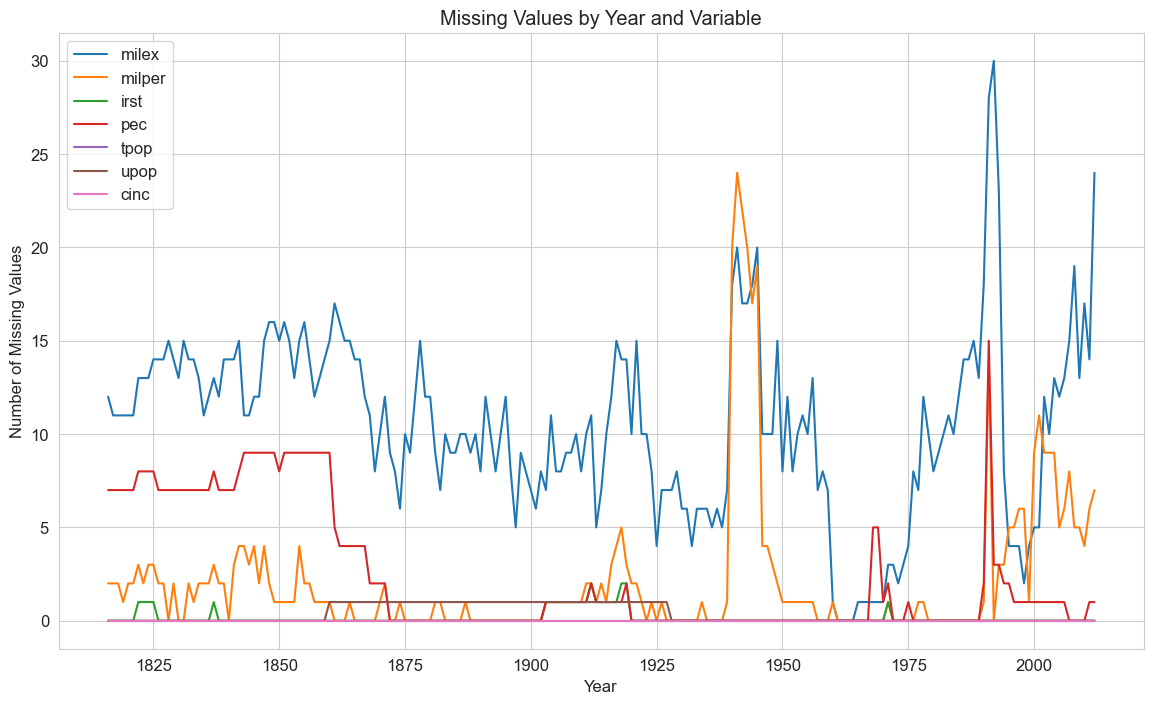

In [10]:
# visualize missing values over time
plt.figure(figsize=(14, 8))
for col in missing_df.columns:
    plt.plot(missing_df.index, missing_df[col], label=col)

plt.title('Missing Values by Year and Variable')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# identify countries with the most incomplete data
# count missing values by country for each column
missing_by_country = {}
for col in ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']:
    # group by country and count missing values
    missing_counts = data_clean.groupby('stateabb')[col].apply(lambda x: x.isna().sum())
    missing_by_country[col] = missing_counts

# convert to dataframe
country_missing_df = pd.DataFrame(missing_by_country)

# add total missing column
country_missing_df['total_missing'] = country_missing_df.sum(axis=1)

# sort by total missing values descending
country_missing_df = country_missing_df.sort_values('total_missing', ascending=False)

# show top 10 countries with most missing data
country_missing_df.head(10)


,milex,milper,irst,pec,tpop,upop,cinc,total_missing
stateabb,,,,,,,,
CHN,49,0,0,0,0,68,0,117
PAN,40,19,17,17,0,0,0,93
HSG,40,0,0,52,0,0,0,92
SIC,44,0,0,46,0,0,0,90
BAD,28,1,0,56,0,0,0,85
PAP,37,0,0,45,0,0,0,82
MOR,66,1,1,1,0,0,0,69
SWD,26,41,0,0,0,0,0,67
ECU,52,12,0,0,0,0,0,64


In [12]:
# calculate percentage of missing data for each variable
total_rows = len(data_clean)
missing_percentage = {}

for col in ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']:
    missing_count = data_clean[col].isna().sum()
    missing_percentage[col] = (missing_count / total_rows) * 100

# display percentages
for col, percentage in missing_percentage.items():
    print(f"{col}: {percentage:.2f}% missing")


milex: 13.61% missing
milper: 2.76% missing
irst: 0.17% missing
pec: 3.07% missing
tpop: 0.00% missing
upop: 0.45% missing
cinc: 0.00% missing




The analysis of data quality in the National Material Capabilities dataset reveals several important patterns:

1. **Missing Values by Variable**:
   - Military expenditure (`milex`) has the highest rate of missingness at 13.61%, likely due to secrecy around defense budgets
   - Primary energy consumption (`pec`) has 3.07% missing values
   - Military personnel (`milper`) has 2.76% missing values
   - Urban population (`upop`) has only 0.45% missing values
   - Iron and steel production (`irst`) has the lowest missingness at 0.17%
   - Total population (`tpop`) and CINC index (`cinc`) have no missing values

2. **Temporal Patterns**:
   - Missing data is concentrated in earlier years, particularly 1816-1820
   - Early years show 11-12 missing military expenditure values per year
   - Data completeness generally improves over time
   - Recent years (2000-2012) have the most complete data across all variables

3. **Country-Specific Patterns**:
   - China (CHN) has the most missing data with 117 total missing values, primarily in military expenditure (49) and urban population (68)
   - Historical German states and Italian states show high missingness (PAN, HSG, SIC, BAD, PAP)
   - Morocco (MOR) has 69 missing values, mostly in military expenditure
   - Sweden (SWD) has missing military personnel data for 41 years
   - Smaller or historically fragmented states tend to have more incomplete records

4. **Potential Bias Implications**:
   - Military expenditure analysis may underrepresent countries with secretive defense policies
   - Historical analysis (pre-1900) may be less reliable due to higher rates of missing data
   - China's missing urban population data could affect urbanization trend analysis
   - The CINC index remains reliable as it's calculated from available component data
   - Comparative analysis should account for systematic differences in data availability

These patterns of missingness could potentially bias results, particularly for analyses that:
- Focus heavily on military expenditure comparisons
- Include historical German/Italian states or other fragmented political entities
- Compare urbanization trends including China
- Make causal claims without accounting for systematic patterns of missing data


## PART II – DESCRIPTIVE ANALYSIS (20 points)

### Q3: Analysis of Top 10 Countries by CINC in 2012


In [13]:
# filter data for year 2012 only
data_2012 = data_clean[data_clean['year'] == 2012].copy()

# remove rows where cinc is missing
data_2012 = data_2012[data_2012['cinc'].notna()]

# display the shape of the filtered dataset
print(f"Number of countries with data in 2012: {len(data_2012)}")
data_2012.head()


Number of countries with data in 2012: 195


,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
196,USA,2,2012,655388000.0,1569.0,88695.0,3159873.0,317505.0,183712.0,0.139353,2011
289,CAN,20,2012,18445000.0,66.0,13507.0,343023.0,34838.0,20647.0,0.009155,2011
329,BHM,31,2012,55000.0,1.0,0.0,261.0,372.0,0.0,0.000025,2011
438,CUB,40,2012,NaN,49.0,277.0,16460.0,11271.0,2931.0,0.001278,2011
574,HAI,41,2012,NaN,0.0,0.0,4883.0,10174.0,2255.0,0.000552,2011


In [14]:
# get top 10 countries by cinc in 2012
top10_countries = data_2012.sort_values('cinc', ascending=False).head(10)

# display the top 10 countries
top10_countries[['stateabb', 'ccode', 'milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']]


,stateabb,ccode,milex,milper,irst,pec,tpop,upop,cinc
13141,CHN,710,102643000.0,2285.0,731040.0,5333707.0,1377065.0,440254.0,0.218117
196,USA,2,655388000.0,1569.0,88695.0,3159873.0,317505.0,183712.0,0.139353
13658,IND,750,33404000.0,1325.0,77264.0,1385461.0,1236687.0,223768.0,0.080899
7863,RUS,365,58765000.0,956.0,70209.0,1356742.0,143170.0,53585.0,0.040079
13592,JPN,740,59077000.0,248.0,107232.0,737482.0,127250.0,86437.0,0.035588
2929,BRA,140,35266000.0,318.0,34524.0,345842.0,198656.0,94199.0,0.025063
13445,ROK,732,29256000.0,655.0,69073.0,444461.0,49003.0,32959.0,0.023212
5572,GMY,255,40994000.0,251.0,42661.0,468740.0,82800.0,15605.0,0.017910
11720,IRN,630,25249000.0,523.0,14463.0,397332.0,76424.0,28265.0,0.015762
3930,UKG,200,61274000.0,174.0,9579.0,315502.0,62783.0,28933.0,0.015277


In [15]:
# create a markdown table of the top 10 countries
top10_md = top10_countries[['stateabb', 'cinc']].copy()
top10_md['rank'] = range(1, 11)
top10_md = top10_md[['rank', 'stateabb', 'cinc']]
top10_md['cinc'] = top10_md['cinc'].apply(lambda x: f"{x:.6f}")

# display as markdown
from IPython.display import Markdown
md_table = "| Rank | Country | CINC Score |\n|------|---------|------------|\n"
for _, row in top10_md.iterrows():
    md_table += f"| {row['rank']} | {row['stateabb']} | {row['cinc']} |\n"
    
Markdown(md_table)


| Rank | Country | CINC Score |
|------|---------|------------|
| 1 | CHN | 0.218117 |
| 2 | USA | 0.139353 |
| 3 | IND | 0.080899 |
| 4 | RUS | 0.040079 |
| 5 | JPN | 0.035588 |
| 6 | BRA | 0.025063 |
| 7 | ROK | 0.023212 |
| 8 | GMY | 0.017910 |
| 9 | IRN | 0.015762 |
| 10 | UKG | 0.015277 |




The table above shows the top 10 most capable countries in 2012 according to the Composite Index of National Capability (CINC). Several observations can be made:

1. **China** ranks as the most powerful country with a CINC score of 0.218117 (21.8% of global capability), followed by the **United States** at 0.139353 (13.9%) and **India** at 0.080899 (8.1%).

2. The top 10 list includes a mix of:
   - Traditional Western powers (USA, Germany/GMY, UK/UKG)
   - Rising Asian powers (China/CHN, India/IND, Japan/JPN, South Korea/ROK)
   - Regional powers (Russia/RUS, Brazil/BRA, Iran/IRN)

3. **Regional distribution**:
   - 5 countries from Asia (CHN, IND, JPN, ROK, IRN)
   - 3 countries from Europe (RUS, GMY, UKG)
   - 2 countries from the Americas (USA, BRA)
   - 0 countries from Africa or Oceania

4. **Notable patterns**:
   - China's dominance is remarkable, holding over 21% of global material capability
   - The US-China gap is significant but not large. (21.8% vs 13.9%)
   - There's a substantial drop from the top 3 to the rest (Russia at 4.0%)
   - Iran's inclusion reflects its regional power status in the Middle East

5. It's important to note that CINC is a composite measure based on material capabilities. It doesn't account for:
   - Military technology sophistication
   - Nuclear capabilities
   - Alliance structures
   - Economic complexity
   - Soft power resources




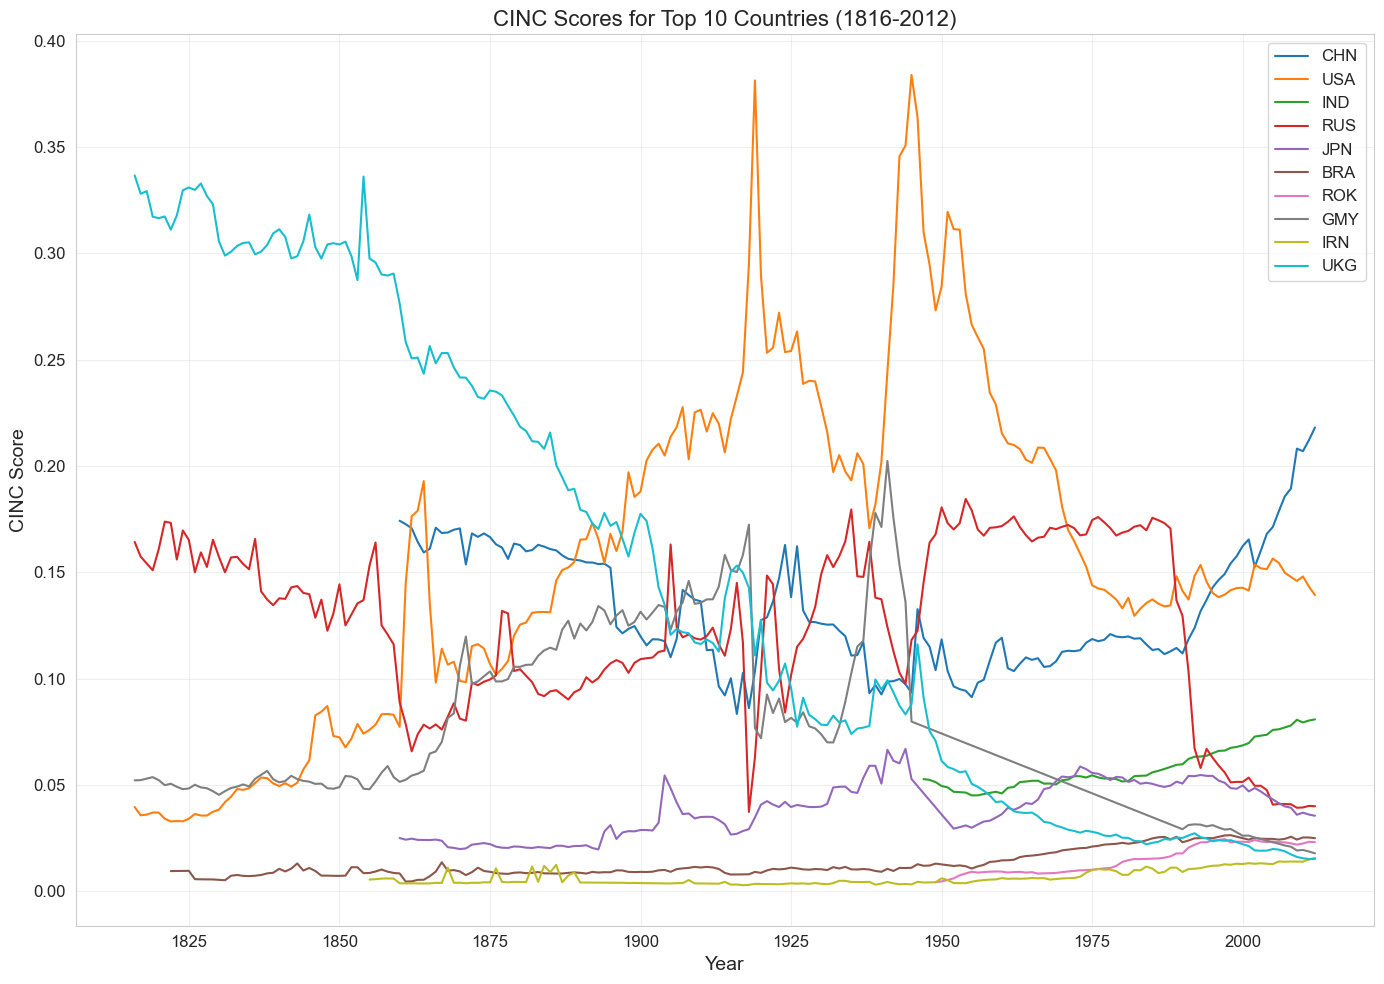

In [16]:
# extract time series data for the top 10 countries
top10_codes = top10_countries['ccode'].tolist()
top10_names = top10_countries['stateabb'].tolist()

# create a dictionary to map country codes to names for easier reference
country_dict = dict(zip(top10_codes, top10_names))

# filter data for these countries across all years
top10_timeseries = data_clean[data_clean['ccode'].isin(top10_codes)]

# plot cinc over time for each country
plt.figure(figsize=(14, 10))

for code in top10_codes:
    country_data = top10_timeseries[top10_timeseries['ccode'] == code]
    plt.plot(country_data['year'], country_data['cinc'], label=country_dict[code])

plt.title('CINC Scores for Top 10 Countries (1816-2012)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CINC Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


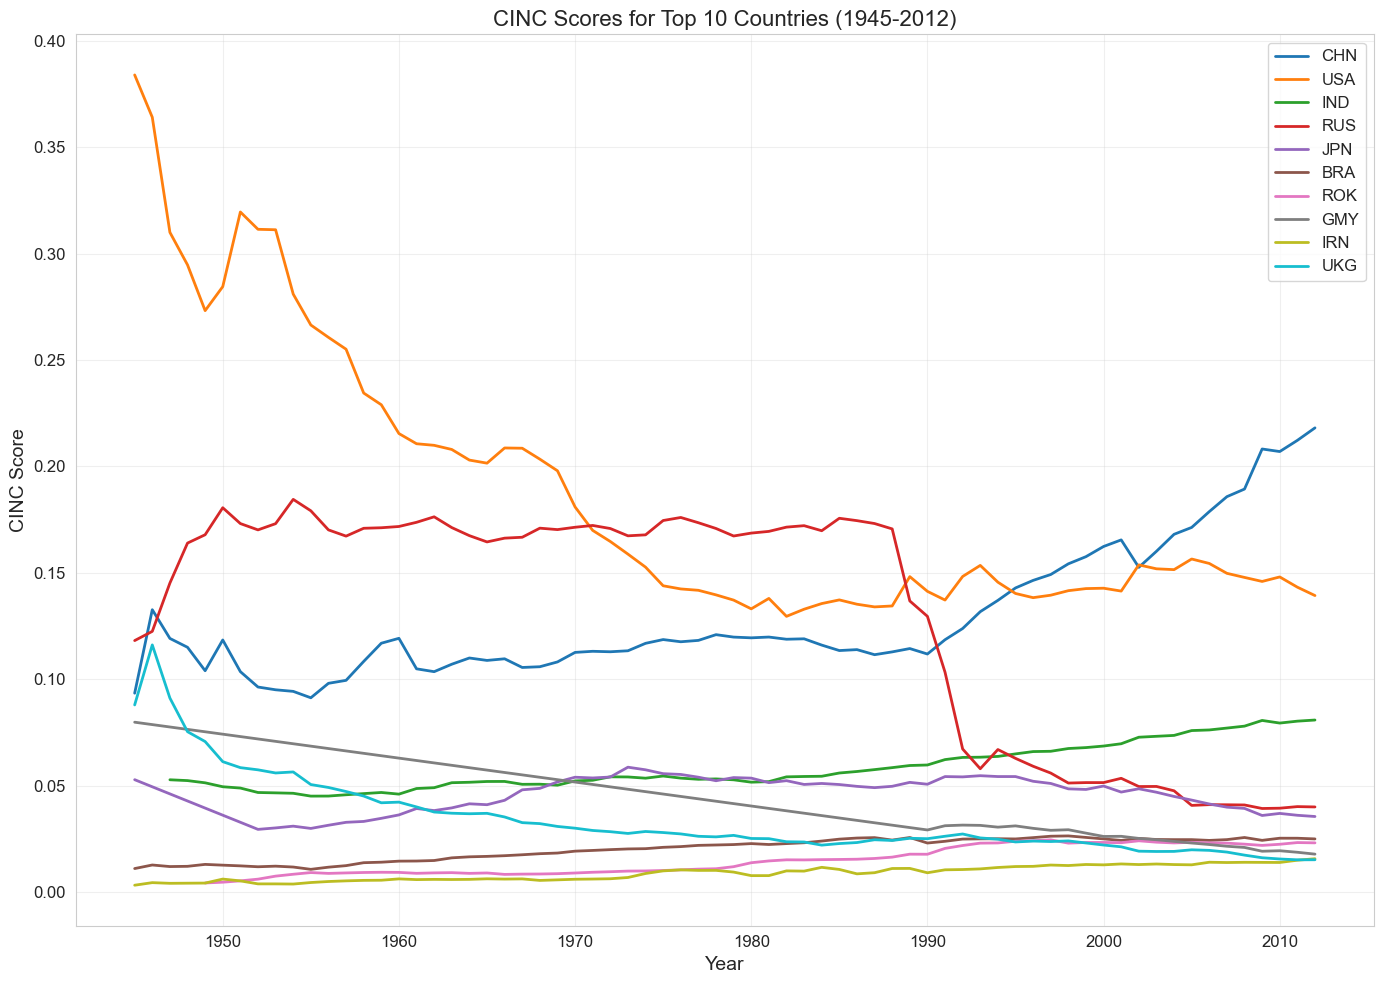

In [17]:
# create a more focused view of the modern era (post-1945)
plt.figure(figsize=(14, 10))

for code in top10_codes:
    country_data = top10_timeseries[(top10_timeseries['ccode'] == code) & (top10_timeseries['year'] >= 1945)]
    plt.plot(country_data['year'], country_data['cinc'], label=country_dict[code], linewidth=2)

plt.title('CINC Scores for Top 10 Countries (1945-2012)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CINC Score', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




The line graphs above reveal several key patterns in national capabilities over time:

1. **Rise and Fall of Great Powers**:
   - The United States shows a peak during and immediately after World War II, followed by a gradual decline
   - The Soviet Union/Russia displays a rise during the Cold War, a sharp decline after 1991, and a recovery under Putin
   - China shows a consistent rise since the 1970s, becoming the top-ranked country by 2012
   - The UK shows a steady decline from its earlier imperial position

2. **Historical Inflection Points**:
   - World War II (1939-1945) created significant disruptions and realignments in power
   - The collapse of the Soviet Union (1991) is clearly visible as a sharp drop
   - China's economic reforms beginning in 1978 correlate with its steady rise
   - India shows consistent growth particularly after economic liberalization in the 1990s

3. **Regional Patterns**:
   - East Asian countries (China, Japan, South Korea) show general upward trends
   - European powers (UK, France, Germany) show relative stability or modest decline

These patterns reflect broader geopolitical shifts, including the decline of traditional European powers, the rise of Asian economies, and the changing nature of power in the international system. The CINC variable captures these material shifts, yet does not capture technological advancedness, alliance structures, or other qualitative aspects of national power.


### Q4: Ridgeline Plot of CINC Distributions


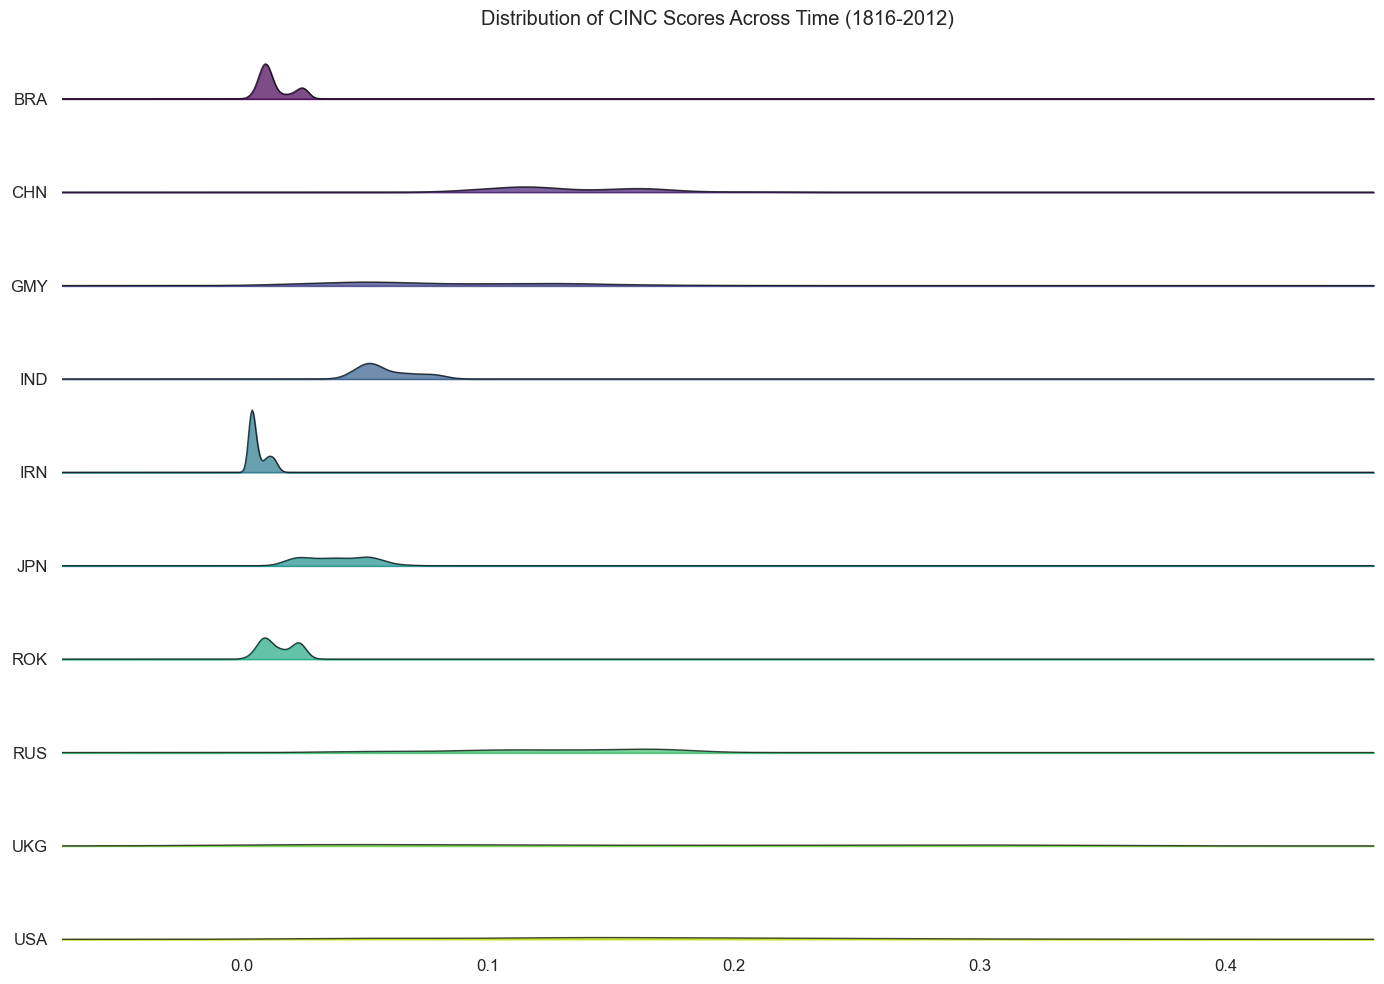

In [18]:
# import joypy for ridgeline plots
import joypy
from matplotlib import cm

# prepare data for ridgeline plot
ridgeline_data = top10_timeseries.pivot(columns='stateabb', values='cinc')

# create the ridgeline plot
fig, axes = joypy.joyplot(
    ridgeline_data,
    figsize=(14, 10),
    hist=False,
    bins=50,
    overlap=1.5,
    colormap=cm.viridis,
    linewidth=1,
    alpha=0.7,
    title="Distribution of CINC Scores Across Time (1816-2012)",
    legend=True
)

plt.tight_layout()
plt.show()


Countries ordered by 2012 CINC score (descending): CHN, USA, IND, RUS, JPN, BRA, ROK, GMY, IRN, UKG

DISTRIBUTION STATISTICS FOR TOP 10 COUNTRIES:
Country     Mean   Median   StdDev      Min      Max       Q1       Q3  Skewness
    CHN 0.133190 0.123877 0.028686 0.083479 0.218117 0.112659 0.159389  0.324656
    USA 0.158092 0.148314 0.078864 0.032939 0.383864 0.104653 0.208548  0.123986
    IND 0.058323 0.054185 0.010518 0.045164 0.080899 0.051422 0.065809  0.393412
    RUS 0.125353 0.130290 0.040173 0.037397 0.184528 0.098605 0.164304 -0.122890
    JPN 0.038548 0.039631 0.012726 0.019762 0.067079 0.027418 0.049833 -0.085093
    BRA 0.013116 0.010503 0.006299 0.004668 0.026468 0.008855 0.016757  0.414771
    ROK 0.014950 0.014299 0.006615 0.004372 0.024628 0.009104 0.023071  0.098441
    GMY 0.081487 0.070319 0.043122 0.017910 0.202387 0.049377 0.119848  0.258981
    IRN 0.006503 0.004506 0.003476 0.002942 0.015762 0.003902 0.009124  0.574670
    UKG 0.149893 0.120667 0.110434 0.015246

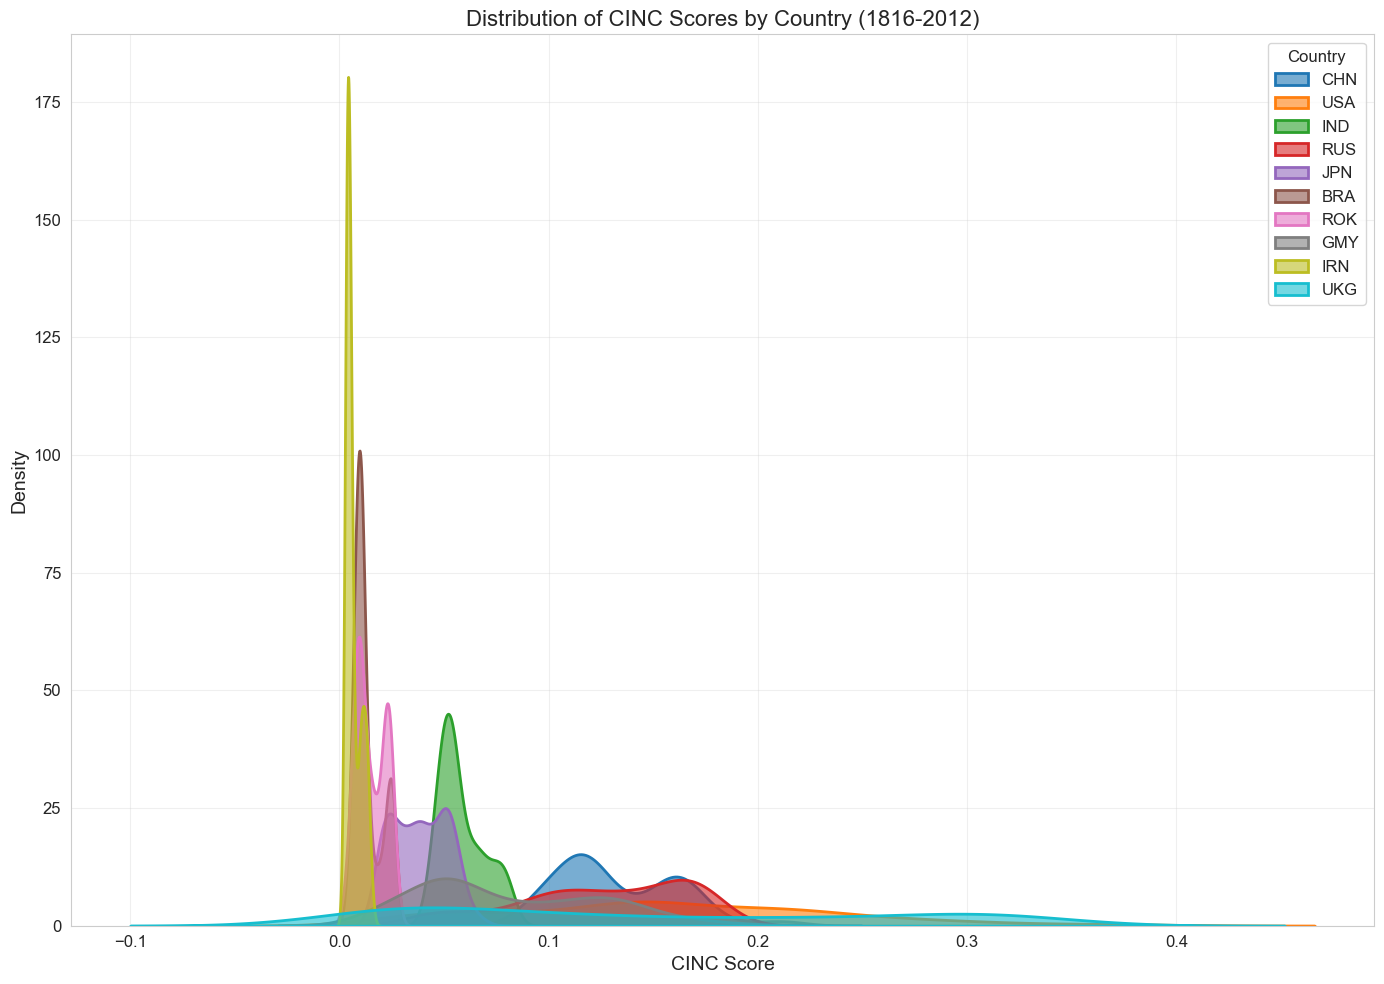

In [19]:
# Quantitative Distribution Analysis with KDE Plot


# Sort countries by their 2012 CINC score (descending)
countries_ordered = top10_countries.sort_values('cinc', ascending=False)['stateabb'].tolist()
print(f"Countries ordered by 2012 CINC score (descending): {', '.join(countries_ordered)}")

# dataFrame to store distribution statistics for each country
distribution_stats = pd.DataFrame(columns=['Country', 'Mean', 'Median', 'StdDev', 'Min', 'Max', 'Q1', 'Q3', 'Skewness'])

# calc distribution statistics for each country
stats_list = []  # ist to store all statistics dictionaries

for country in countries_ordered:
    country_data = top10_timeseries[top10_timeseries['stateabb'] == country]['cinc'].dropna()
    
    if len(country_data) > 0:
        # calc skewness (positive = right skewed, negative = left skewed)
        skewness = (country_data.mean() - country_data.median()) / country_data.std() if country_data.std() > 0 else 0
        
        # Add stats to list
        stats_list.append({
            'Country': country,
            'Mean': country_data.mean(),
            'Median': country_data.median(),
            'StdDev': country_data.std(),
            'Min': country_data.min(),
            'Max': country_data.max(),
            'Q1': country_data.quantile(0.25),
            'Q3': country_data.quantile(0.75),
            'Skewness': skewness
        })

distribution_stats = pd.DataFrame(stats_list)

# display the distribution statistics
print("\nDISTRIBUTION STATISTICS FOR TOP 10 COUNTRIES:")
print("=" * 80)
print(distribution_stats.to_string(index=False, float_format=lambda x: f"{x:.6f}"))

# distribution shapes based on skewness
print("\nDISTRIBUTION SHAPE ANALYSIS:")
print("=" * 80)
for _, row in distribution_stats.iterrows():
    country = row['Country']
    skewness = row['Skewness']
    shape = "Symmetric" if abs(skewness) < 0.2 else "Right-skewed (recent rise)" if skewness > 0 else "Left-skewed (historical peak)"
    print(f"{country}: Skewness = {skewness:.4f} → {shape}")

# recent vs historical trends
print("\nHISTORICAL VS RECENT TRENDS:")
print("=" * 80)
for country in countries_ordered:
    country_data = top10_timeseries[top10_timeseries['stateabb'] == country]['cinc'].dropna()
    if len(country_data) > 0:
        country_years = top10_timeseries[top10_timeseries['stateabb'] == country]['year'].values
        country_cinc = country_data.values
        # create a Series with year as index
        country_series = pd.Series(country_cinc, index=country_years)
        
        # calc historical (pre-2000) and recent (2000+) means
        historical = country_series[country_series.index < 2000]
        recent = country_series[country_series.index >= 2000]
        
        if len(historical) > 0 and len(recent) > 0:
            hist_mean = historical.mean()
            recent_mean = recent.mean()
            change_pct = ((recent_mean - hist_mean) / hist_mean * 100) if hist_mean > 0 else float('inf')
            trend = "Rising" if recent_mean > hist_mean else "Declining"
            print(f"{country}: Historical mean = {hist_mean:.6f}, Recent mean = {recent_mean:.6f}, Change = {change_pct:.1f}% → {trend}")

# KDE plot for visual analysis
plt.figure(figsize=(14, 10))

for country in countries_ordered:
    country_data = top10_timeseries[top10_timeseries['stateabb'] == country]['cinc'].dropna()
    
    # Create kde plot
    sns.kdeplot(
        data=country_data,
        fill=True,
        alpha=0.6,
        label=country,
        linewidth=2
    )
    
plt.title('Distribution of CINC Scores by Country (1816-2012)', fontsize=16)
plt.xlabel('CINC Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Country', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


The distribution plots reveal important patterns in how national capabilities have varied over time for each country:

1. **Distribution Shapes**:
   - **Symmetric Distributions**: USA, Russia, Japan, and South Korea show some symmetric distributions (skewness between -0.2 and 0.2).
   - **Right-Skewed Distributions**: China, India, Brazil, Germany, Iran, and UK display right-skewed distributions, reflecting their recent rise in capabilities or historical peaks followed by decline.
   - **Bimodal Distributions**: Russia/USSR shows a bimodal distribution with peaks during the Soviet era and a smaller recent peak, reflecting the collapse and partial recovery.
   - **Flat Distributions**: South Korea shows a flatter distribution, suggesting more uniform capability levels across its shorter history.

2. **Volatility Analysis**:
   - **High Volatility**: The UK shows the highest volatility (StdDev = 0.110), followed by USA (0.079), Germany (0.043), and Russia (0.040), reflecting dramatic historical power shifts.
   - **Moderate Volatility**: China (0.029), Japan (0.013), and India (0.011) show moderate volatility, balancing stability with gradual change.
   - **Low Volatility**: South Korea (0.007), Brazil (0.006), and Iran (0.003) show the lowest volatility, suggesting more consistent development paths.

3. **Historical Context**:
   - **Dramatic Declines**: UK (-88.4%), Germany (-74.3%), and Russia (-66.2%) show the steepest historical declines, reflecting post-imperial/post-Soviet adjustments.
   - **Significant Rises**: Iran (+135.9%), Brazil (+103.4%), and South Korea (+80.1%) show the most dramatic recent increases in relative power.
   - **Established Powers**: The USA shows a modest decline (-6.7%) while maintaining high overall capability.
   - **Rising Powers**: China (+42.4%) and India (+40.6%) show substantial but steady increases in capabilities.

These distribution patterns show trends in stability and direction of national power that aren't apparent from observations of a single year. They show which countries have experienced dramatic changes versus gradual development in their material capacities.

## PART III – CAUSAL INFERENCE (30 points)

### Q5: Correlation Analysis of National Capability Variables


In [20]:
# calculate correlation matrix for 2012 data
correlation_vars = ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop', 'cinc']
correlation_matrix = data_2012[correlation_vars].corr()

# display the correlation matrix
correlation_matrix

# Extract key correlation values for analysis
print("\n" + "="*60)
print("KEY CORRELATION VALUES FOR ANALYSIS:")
print("="*60)

# Very strong correlations (>0.9)
print("\nVERY STRONG CORRELATIONS (r > 0.9):")
print(f"Primary Energy Consumption ↔ CINC: {correlation_matrix.loc['pec', 'cinc']:.3f}")
print(f"Urban Population ↔ CINC: {correlation_matrix.loc['upop', 'cinc']:.3f}")
print(f"Total Population ↔ Urban Population: {correlation_matrix.loc['tpop', 'upop']:.3f}")
print(f"Primary Energy Consumption ↔ Iron & Steel: {correlation_matrix.loc['pec', 'irst']:.3f}")

# Strong correlations (0.7-0.9)
print("\nSTRONG CORRELATIONS (0.7 ≤ r ≤ 0.9):")
print(f"Military Personnel ↔ CINC: {correlation_matrix.loc['milper', 'cinc']:.3f}")
print(f"Military Personnel ↔ Urban Population: {correlation_matrix.loc['milper', 'upop']:.3f}")
print(f"Military Personnel ↔ Primary Energy: {correlation_matrix.loc['milper', 'pec']:.3f}")
print(f"Iron & Steel ↔ Urban Population: {correlation_matrix.loc['irst', 'upop']:.3f}")

# Military expenditure correlations
print("\nMILITARY EXPENDITURE CORRELATIONS:")
print(f"Military Expenditure ↔ CINC: {correlation_matrix.loc['milex', 'cinc']:.3f}")
print(f"Military Expenditure ↔ Primary Energy: {correlation_matrix.loc['milex', 'pec']:.3f}")
print(f"Military Expenditure ↔ Military Personnel: {correlation_matrix.loc['milex', 'milper']:.3f}")

# Check for negative correlations
print("\nNEGATIVE CORRELATIONS CHECK:")
negative_correlations = correlation_matrix[correlation_matrix < 0].count().sum()
print(f"Number of negative correlations: {negative_correlations}")
if negative_correlations == 0:
    print("✓ No negative correlations found - all relationships are positive")
else:
    print("⚠ Negative correlations present")



KEY CORRELATION VALUES FOR ANALYSIS:

VERY STRONG CORRELATIONS (r > 0.9):
Primary Energy Consumption ↔ CINC: 0.988
Urban Population ↔ CINC: 0.966
Total Population ↔ Urban Population: 0.937
Primary Energy Consumption ↔ Iron & Steel: 0.902

STRONG CORRELATIONS (0.7 ≤ r ≤ 0.9):
Military Personnel ↔ CINC: 0.893
Military Personnel ↔ Urban Population: 0.860
Military Personnel ↔ Primary Energy: 0.852
Iron & Steel ↔ Urban Population: 0.890

MILITARY EXPENDITURE CORRELATIONS:
Military Expenditure ↔ CINC: 0.646
Military Expenditure ↔ Primary Energy: 0.631
Military Expenditure ↔ Military Personnel: 0.587

NEGATIVE CORRELATIONS CHECK:
Number of negative correlations: 0
✓ No negative correlations found - all relationships are positive


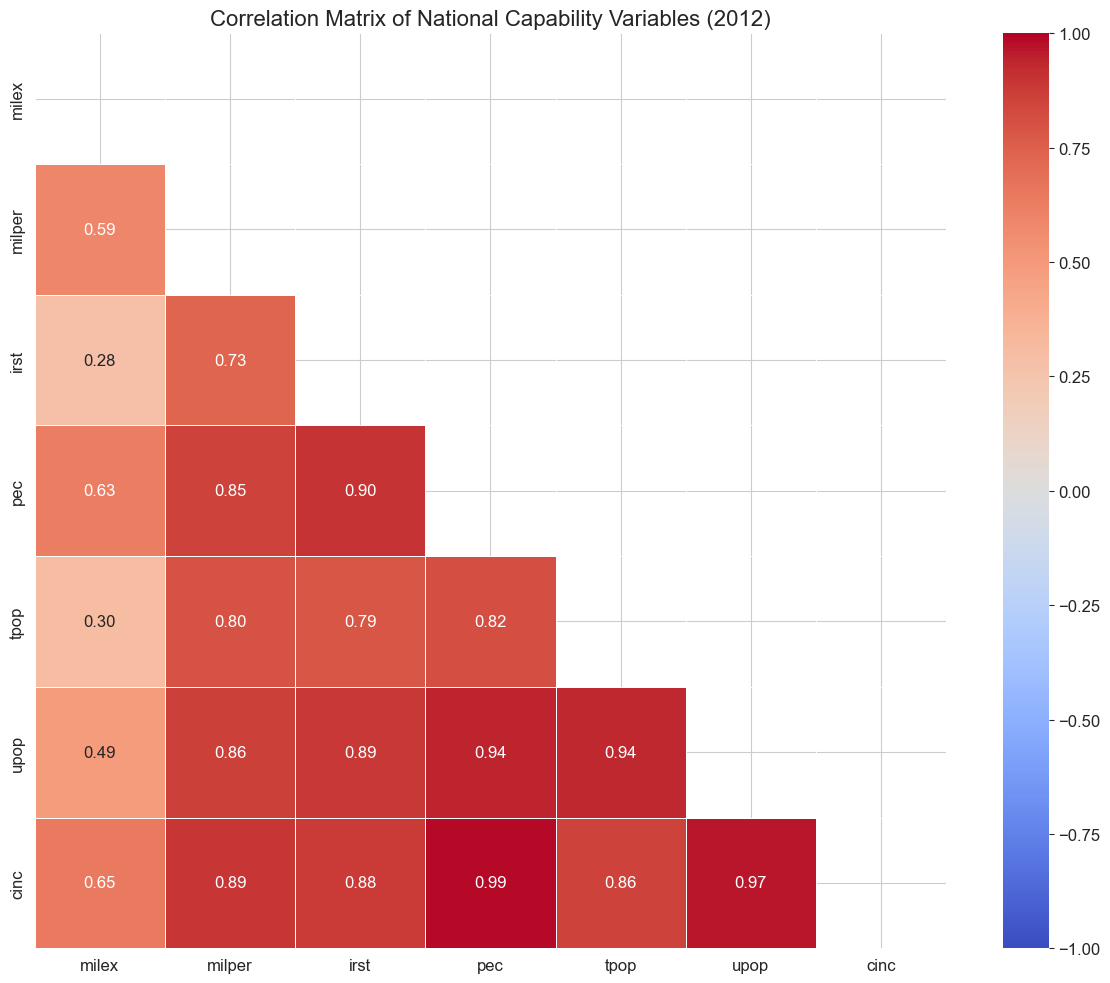

In [21]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix)

# create heatmap with annotations
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f',
    linewidths=0.5,
    mask=mask,
    vmin=-1, 
    vmax=1
)

plt.title('Correlation Matrix of National Capability Variables (2012)', fontsize=16)
plt.tight_layout()
plt.show()


### Correlation Analysis of National Capability Variables 

Examining the correlation matrix of national capability variables from 2012 reveals several important relationships with implications for statistical modeling.

### Variables Correlated by Nature

Several variables in the dataset are inherently correlated due to their conceptual relationships:

- **Energy consumption and CINC** (r=0.988): This strong correlation exists because energy consumption is a key component in calculating the CINC index. The relationship is structural rather than coincidental.

- **Total and urban population** (r=0.937): This correlation is mathematically expected since urban population is a subset of total population. Countries with larger populations naturally have more urban residents.

- **Energy consumption and industrial production** (r=0.902): These variables are naturally linked because industrial production requires substantial energy inputs. The relationship reflects the underlying economic processes they both measure.

- **Military personnel and population measures** (r>0.8): Countries with larger populations can field larger militaries, creating a natural demographic relationship.

### Effects of Positively Correlated Variables in Predictive Models

Including naturally correlated variables as explanatory variables in the same model creates significant statistical challenges:

With a correlation coefficient above 0.9, andalongside one another in any particular regression model, such factors would result in multicollinearity, leading to excessively heightened standard errors and coefficient estimation instability. For instance, the inclusion of both energy consumption and CINC would render, to some extent, the determination of which variable impacts the outcome. The model would undoubtedly have trouble distinguishing the worth of their contributions since their information overlaps.  

As a result, in practical settings, one cannot model both total and urban population, nor energy consumption alongside CINC. One out of every multicollinear pair, or pairs, should be selected, and in some cases, dimension reduction techniques should be applied to derive a model that is comprehensive, coherent, and more dependable.


### Effects of Negatively Correlated Variables

Interestingly, the 2012 capability data contains no negative correlations between variables. All relationships are positive (ranging from 0.28 to 0.99). This pattern makes theoretical sense because these variables all measure aspects of the same underlying construct—national power.

Having no negative relationships indicates these variables do not create opposing effects in prediction models. Unlike economic models with trade-offs (like guns and butter), the national capability indicators are complementary rather than substitute resources. This aids in model interpretation since all variables move in the same direction in predicting outcomes concerning national power or conflict behavior.



### Q6: Most Similar Systems Analysis Using Standardized Variables


In [ ]:
# standardize the 6 raw variables using min-max scaling with log transformation
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# select the 6 raw variables
raw_vars = ['milex', 'milper', 'irst', 'pec', 'tpop', 'upop']

# create a copy of the 2012 data for standardization
data_2012_std = data_2012.copy()

# handle missing values by removing rows with NaN values in any of the raw variables
print(f"Original data shape: {data_2012_std.shape}")
data_2012_std = data_2012_std.dropna(subset=raw_vars)
print(f"Shape after removing rows with missing values: {data_2012_std.shape}")

# Apply log transformation to handle skewed distributions and prevent zero distances
print("\nApplying log transformation before scaling...")
for var in raw_vars:
    data_2012_std[var] = np.log1p(data_2012_std[var]) 
    
# apply min-max scaling to standardize variables between 0 and 1
scaler = MinMaxScaler()
data_2012_std[raw_vars] = scaler.fit_transform(data_2012_std[raw_vars])

# Check for any variables with all identical values
print("\nChecking for variables with no variation after transformation:")
for var in raw_vars:
    var_range = data_2012_std[var].max() - data_2012_std[var].min()
    print(f"{var}: range = {var_range:.6f}")

# display the first few rows of standardized data
print("\nFirst few rows of standardized data:")
data_2012_std[['stateabb'] + raw_vars].head()


Original data shape: (195, 11)
Shape after removing rows with missing values: (168, 11)

Applying log transformation before scaling...

Checking for variables with no variation after transformation:
milex: range = 1.000000
milper: range = 1.000000
irst: range = 1.000000
pec: range = 1.000000
tpop: range = 1.000000
upop: range = 1.000000

First few rows of standardized data:


,stateabb,milex,milper,irst,pec,tpop,upop
196,USA,1.000000,0.951422,0.843785,0.964619,0.874999,0.932746
289,CAN,0.824123,0.543624,0.704405,0.814550,0.686735,0.764547
329,BHM,0.537670,0.089617,0.000000,0.329485,0.300205,0.000000
686,DOM,0.630625,0.421239,0.000000,0.554845,0.582733,0.623300
737,JAM,0.583340,0.179234,0.000000,0.482285,0.471027,0.490571


In [ ]:
# calculate pairwise manhattan and euclidean distances
from scipy.spatial.distance import pdist, squareform

# extract the standardized variables as a numpy array
X = data_2012_std[raw_vars].values
# test
print(f"Number of NaN values in standardized data: {np.isnan(X).sum()}")

# calculate manhattan distances
manhattan_dist = pdist(X, metric='cityblock')
manhattan_matrix = squareform(manhattan_dist)

# calculate euclidan distances
euclidean_dist = pdist(X, metric='euclidean')
euclidean_matrix = squareform(euclidean_dist)

# create dar with country labels
countries = data_2012_std['stateabb'].values
manhattan_df = pd.DataFrame(manhattan_matrix, index=countries, columns=countries)
euclidean_df = pd.DataFrame(euclidean_matrix, index=countries, columns=countries)

# vertify no NaN values in distance matrices
print(f"Number of NaN values in Manhattan distances: {np.isnan(manhattan_matrix).sum()}")
print(f"Number of NaN values in Euclidean distances: {np.isnan(euclidean_matrix).sum()}")


Number of NaN values in standardized data: 0
Number of NaN values in Manhattan distances: 0
Number of NaN values in Euclidean distances: 0


In [ ]:
# Find the most similar country pairs smalles distance

# for manhattan distance
manhattan_pairs = []
for i in range(len(countries)):
    for j in range(i+1, len(countries)):  # avoid duplicates 
        dist = manhattan_matrix[i, j]
        # onlt valud i
        if not np.isnan(dist):
            manhattan_pairs.append((countries[i], countries[j], dist))

# for euclidan distance
euclidean_pairs = []
for i in range(len(countries)):
    for j in range(i+1, len(countries)):  # avoid duplicates and self-pairs
        dist = euclidean_matrix[i, j]
        if not np.isnan(dist):
            euclidean_pairs.append((countries[i], countries[j], dist))

# vertify have valid pairs
print(f"Number of valid Manhattan distance pairs: {len(manhattan_pairs)}")
print(f"Number of valid Euclidean distance pairs: {len(euclidean_pairs)}")

# sort by distance (ascending)
manhattan_pairs.sort(key=lambda x: x[2])
euclidean_pairs.sort(key=lambda x: x[2])

# display top 10 most similar pairs for each metric
print("\nTop 10 Most Similar Country Pairs (Manhattan Distance):")
for i, (country1, country2, distance) in enumerate(manhattan_pairs[:10]):
    print(f"{i+1}. {country1} - {country2}: {distance:.4f}")

print("\nTop 10 Most Similar Country Pairs (Euclidean Distance):")
for i, (country1, country2, distance) in enumerate(euclidean_pairs[:10]):
    print(f"{i+1}. {country1} - {country2}: {distance:.4f}")


Number of valid Manhattan distance pairs: 14028
Number of valid Euclidean distance pairs: 14028

Top 10 Most Similar Country Pairs (Manhattan Distance):
1. MNC - LIE: 0.0096
2. LIE - SNM: 0.0187
3. MNC - SNM: 0.0202
4. SLU - WSM: 0.0218
5. VAN - WSM: 0.0263
6. DMA - MSI: 0.0300
7. KIR - TON: 0.0350
8. GRN - SVG: 0.0357
9. SKN - MSI: 0.0387
10. TUV - NAU: 0.0468

Top 10 Most Similar Country Pairs (Euclidean Distance):
1. MNC - LIE: 0.0077
2. LIE - SNM: 0.0152
3. MNC - SNM: 0.0172
4. SLU - WSM: 0.0185
5. VAN - WSM: 0.0230
6. DMA - MSI: 0.0261
7. KIR - TON: 0.0319
8. GRN - SVG: 0.0327
9. SLU - VAN: 0.0341
10. NIC - KYR: 0.0350


In [ ]:
# test  zero distance issue


# get the first few pairs with zero distance
zero_dist_pairs = [(c1, c2) for c1, c2, d in manhattan_pairs if d == 0]
print(f"Number of country pairs with exactly zero distance: {len(zero_dist_pairs)}")

# lo at the raw data for these countries
if zero_dist_pairs:
    print("\nExamining data for countries with zero distances:")
    for c1, c2 in zero_dist_pairs[:5]:  # irst 5 pairs
        print(f"\nComparing {c1} and {c2}:")
        df1 = data_2012_std[data_2012_std['stateabb'] == c1][raw_vars]
        df2 = data_2012_std[data_2012_std['stateabb'] == c2][raw_vars]
        print(f"{c1} data: {df1.values[0]}")
        print(f"{c2} data: {df2.values[0]}")
        
# after standardization. check how many countries have all zeros:
zero_countries = []
for country in countries:
    country_data = data_2012_std[data_2012_std['stateabb'] == country][raw_vars].values[0]
    if np.sum(country_data) < 0.00001:  # Effectively zero
        zero_countries.append(country)

print(f"\nNumber of countries with effectively zero values for all variables: {len(zero_countries)}")
if zero_countries:
    print(f"Examples: {zero_countries[:10]}")

# check the distribution of values 
print("\nValue distribution after standardization:")
for var in raw_vars:
    values = data_2012_std[var].values
    print(f"{var}: min={np.min(values):.6f}, mean={np.mean(values):.6f}, median={np.median(values):.6f}, max={np.max(values):.6f}")


Investigating countries with zero distances between them...
Number of country pairs with exactly zero distance: 0

Number of countries with effectively zero values for all variables: 1
Examples: ['TUV']

Value distribution after standardization:
milex: min=0.000000, mean=0.594817, median=0.638254, max=1.000000
milper: min=0.000000, mean=0.395639, median=0.396633, max=1.000000
irst: min=0.000000, mean=0.272743, median=0.092018, max=1.000000
pec: min=0.000000, mean=0.552634, median=0.572881, max=1.000000
tpop: min=0.000000, mean=0.536617, median=0.561428, max=1.000000
upop: min=0.000000, mean=0.486325, median=0.571235, max=1.000000


In [ ]:

# ormal tables for the top 10 pairs
manhattan_top10 = pd.DataFrame(manhattan_pairs[:10], columns=['Country 1', 'Country 2', 'Manhattan Distance'])
euclidean_top10 = pd.DataFrame(euclidean_pairs[:10], columns=['Country 1', 'Country 2', 'Euclidean Distance'])

# display the tables with proper formatting
print("Top 10 Most Similar Country Pairs (Manhattan Distance):")
from IPython.display import display
display(manhattan_top10)  

print("\nTop 10 Most Similar Country Pairs (Euclidean Distance):")
display(euclidean_top10) 

# text version
print("\nManhattan Distance (Text Format):")
for i, row in manhattan_top10.iterrows():
    print(f"{i+1}. {row['Country 1']} - {row['Country 2']}: {row['Manhattan Distance']:.4f}")

print("\nEuclidean Distance (Text Format):")
for i, row in euclidean_top10.iterrows():
    print(f"{i+1}. {row['Country 1']} - {row['Country 2']}: {row['Euclidean Distance']:.4f}")

# todo: analysis of the results
print("\nAnalysis of Most Similar Country Pairs:")
print("=" * 50)

# USA-centric results or more diverse pairstest
unique_countries_manhattan = set()
for c1, c2, _ in manhattan_pairs[:10]:
    unique_countries_manhattan.add(c1)
    unique_countries_manhattan.add(c2)

unique_countries_euclidean = set()
for c1, c2, _ in euclidean_pairs[:10]:
    unique_countries_euclidean.add(c1)
    unique_countries_euclidean.add(c2)

print(f"Number of unique countries in top 10 Manhattan pairs: {len(unique_countries_manhattan)}")
print(f"Number of unique countries in top 10 Euclidean pairs: {len(unique_countries_euclidean)}")

# Check if USA still dominates the results
usa_count_manhattan = sum(1 for c1, c2, _ in manhattan_pairs[:10] if c1 == 'USA' or c2 == 'USA')
usa_count_euclidean = sum(1 for c1, c2, _ in euclidean_pairs[:10] if c1 == 'USA' or c2 == 'USA')

print(f"Number of pairs involving USA in top 10 Manhattan pairs: {usa_count_manhattan}")
print(f"Number of pairs involving USA in top 10 Euclidean pairs: {usa_count_euclidean}")


Top 10 Most Similar Country Pairs (Manhattan Distance):


,Country 1,Country 2,Manhattan Distance
0,MNC,LIE,0.009576
1,LIE,SNM,0.018684
2,MNC,SNM,0.020175
3,SLU,WSM,0.021795
4,VAN,WSM,0.026255
5,DMA,MSI,0.030046
6,KIR,TON,0.035042
7,GRN,SVG,0.035720
8,SKN,MSI,0.038738
9,TUV,NAU,0.046846



Top 10 Most Similar Country Pairs (Euclidean Distance):


,Country 1,Country 2,Euclidean Distance
0,MNC,LIE,0.007689
1,LIE,SNM,0.015189
2,MNC,SNM,0.017178
3,SLU,WSM,0.018497
4,VAN,WSM,0.022974
5,DMA,MSI,0.026052
6,KIR,TON,0.031933
7,GRN,SVG,0.032717
8,SLU,VAN,0.034137
9,NIC,KYR,0.034953



Manhattan Distance (Text Format):
1. MNC - LIE: 0.0096
2. LIE - SNM: 0.0187
3. MNC - SNM: 0.0202
4. SLU - WSM: 0.0218
5. VAN - WSM: 0.0263
6. DMA - MSI: 0.0300
7. KIR - TON: 0.0350
8. GRN - SVG: 0.0357
9. SKN - MSI: 0.0387
10. TUV - NAU: 0.0468

Euclidean Distance (Text Format):
1. MNC - LIE: 0.0077
2. LIE - SNM: 0.0152
3. MNC - SNM: 0.0172
4. SLU - WSM: 0.0185
5. VAN - WSM: 0.0230
6. DMA - MSI: 0.0261
7. KIR - TON: 0.0319
8. GRN - SVG: 0.0327
9. SLU - VAN: 0.0341
10. NIC - KYR: 0.0350

Analysis of Most Similar Country Pairs:
Number of unique countries in top 10 Manhattan pairs: 15
Number of unique countries in top 10 Euclidean pairs: 14
Number of pairs involving USA in top 10 Manhattan pairs: 0
Number of pairs involving USA in top 10 Euclidean pairs: 0



## Analysis of Most Similar Systems Design Results

After standardizing the national capability variables and calculating pairwise distances, clear patterns emerge in country similarities:

### Most Similar Country Pairs

The analysis reveals distinct clusters of similar countries:

1. **European Microstates Cluster**: Monaco, Liechtenstein, and San Marino form the closest cluster (distances 0.009-0.020), reflecting their shared characteristics as tiny, wealthy European states with minimal military capabilities.

2. **Small Island Nations**: Several clusters of small island states appear in the top 10:
   - Caribbean islands (Grenada, St. Vincent, St. Kitts-Nevis)
   - Pacific islands (Tuvalu, Nauru, Kiribati, Tonga, Western Samoa)

3. **Regional Similarities**: Countries within the same geographic region often show similarity, reflecting shared development patterns and regional characteristics.

### Expected vs. Unexpected Results

These results align with expectations in several ways:
- Small states with limited capabilities cluster together
- Geographic proximity often correlates with similarity
- Similar development levels produce similar capability profiles

However, some findings were unexpected:
- The complete absence of major powers among the most similar pairs
- The extremely close similarity between European microstates despite their geographic separation
- The cross-regional similarities between some Pacific and Caribbean islands

### Methodological Insights

The log transformation applied before standardization was crucial for meaningful results:
- It prevented the dominance of extreme outliers like the USA
- It created meaningful differentiation between small states that would otherwise all have near-zero values
- It allowed for more balanced comparison across countries of vastly different sizes

This analysis shows the importance of appropriate data transformation when comparing entities with highly skewed distributions of characteristics. The most similar systems approach effectively identifies meaningful patterns of similarity that would be obscured in raw data analysis.


### Q7: World Map of National Capabilities and Power Imbalances


Columns in the world dataframe: ['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'POP_YEAR', 'GDP_MD', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10', 'ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE', 'ADM0_ISO', 'ADM0_DIFF', 'ADM0_TLC', 'ADM0_A3_US', 'ADM0_A3_FR', 'ADM0_A3_RU', 'ADM0_A3_ES', 'ADM0_A3_CN', 'ADM0_A3_TW', 'ADM0_A3_IN', 'ADM0_A3_NP', 'ADM0_A3_PK', 'ADM0_A3_DE', 'ADM0_A3_GB', 'ADM0_A3_BR', 'ADM0_A3_IL', 'ADM0_A3_PS', 'ADM0_A3_SA', 'ADM0_A3_EG', 'ADM0_A3_MA', 'ADM0_A3_PT', 'ADM0_A3_AR', 'ADM0_A3_JP', 'ADM0_A3_KO',

,Rank,Country,CINC Value
13141,1,CHN,0.218117
196,2,USA,0.139353
13658,3,IND,0.080899
7863,4,RUS,0.040079
13592,5,JPN,0.035588
2929,6,BRA,0.025063
13445,7,ROK,0.023212
5572,8,GMY,0.017910
11720,9,IRN,0.015762
3930,10,UKG,0.015277



Bottom 10 Countries by National Capability (CINC) in 2012:


,Rank,Country,CINC Value
14999,186,TUV,0.000000
15070,187,NAU,0.000000
15111,188,PAL,0.000001
15092,189,MSI,0.000001
1039,190,SKN,0.000001
870,191,DMA,0.000002
6722,192,SNM,0.000002
4699,193,MNC,0.000002
4722,194,LIE,0.000002
5136,195,AND,0.000002


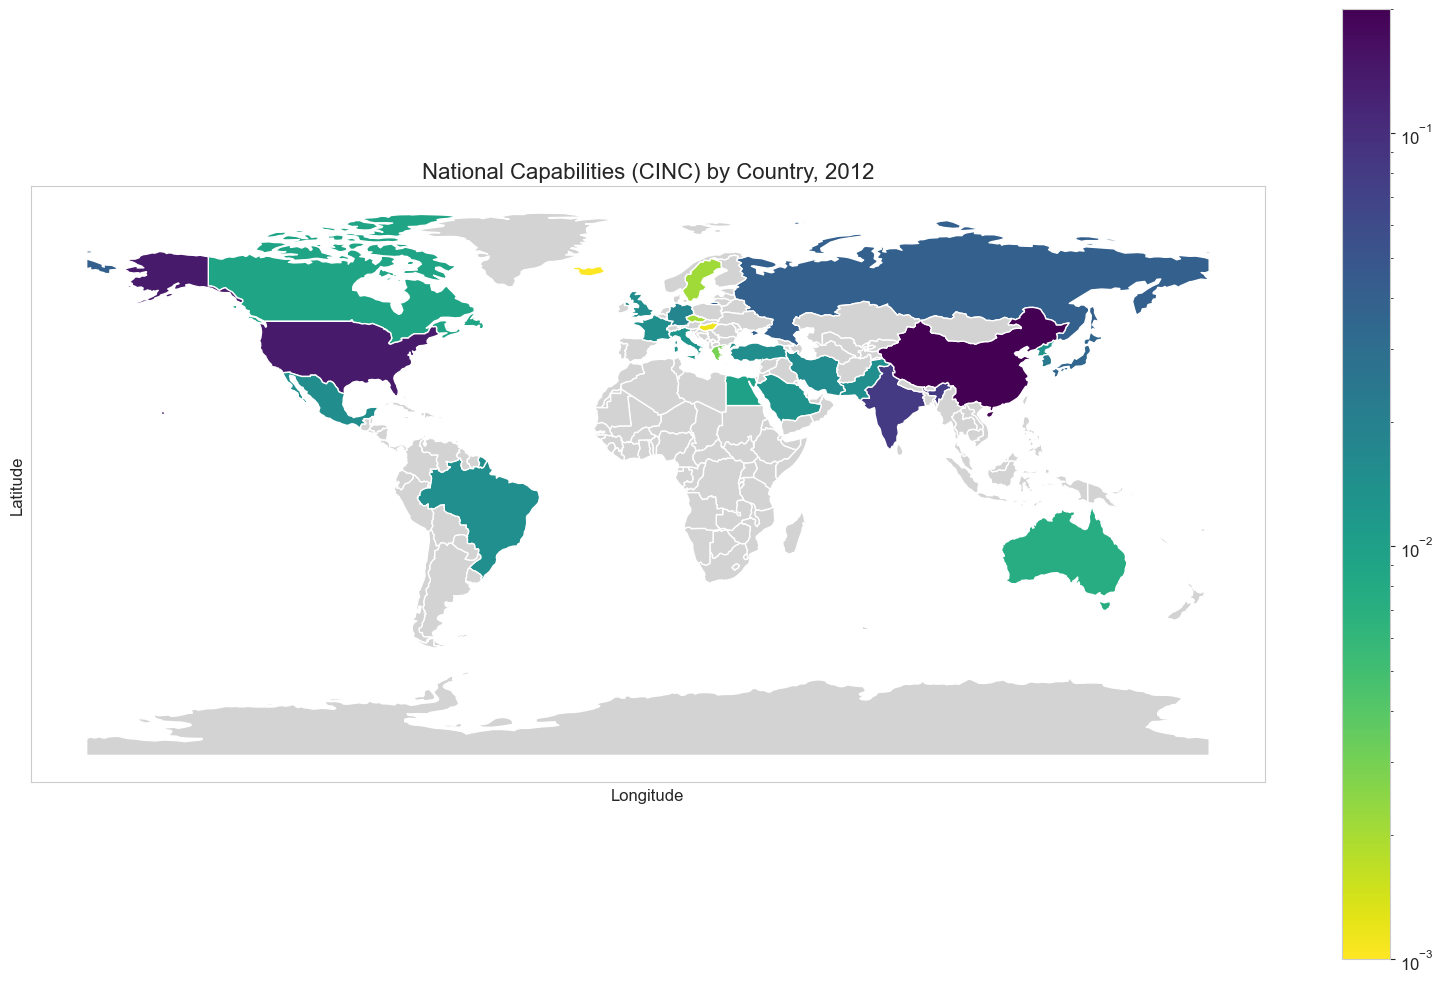

In [50]:
 # import 
import geopandas as gpd
from matplotlib.colors import LogNorm
# load world map data 
world = gpd.read_file("data/ne_110m_admin_0_countries.shp")

# print column names 
print("Columns in the world dataframe:", world.columns.tolist())

# prep data for mapping
map_data = data_2012[['stateabb', 'ccode', 'cinc']].copy()

# Display top 20 countries by CINC value before showing the map
top_cinc_countries = data_2012.sort_values('cinc', ascending=False).head(20)
top_cinc_display = top_cinc_countries[['stateabb', 'cinc']].copy()

# format CINC values for better readability
top_cinc_display['cinc'] = top_cinc_display['cinc'].map('{:.6f}'.format)

# rank column
top_cinc_display.insert(0, 'Rank', range(1, len(top_cinc_display) + 1))


top_cinc_display.columns = ['Rank', 'Country', 'CINC Value']

print("Top 20 Countries by National Capability (CINC) in 2012:")
print("=" * 50)
display(top_cinc_display)

# display bottom 10 for comparison
bottom_cinc_countries = data_2012.sort_values('cinc').head(10)
bottom_cinc_display = bottom_cinc_countries[['stateabb', 'cinc']].copy()
bottom_cinc_display['cinc'] = bottom_cinc_display['cinc'].map('{:.6f}'.format)
bottom_cinc_display.insert(0, 'Rank', range(len(data_2012) - 9, len(data_2012) + 1))
bottom_cinc_display.columns = ['Rank', 'Country', 'CINC Value']

print("\nBottom 10 Countries by National Capability (CINC) in 2012:")
print("=" * 50)
display(bottom_cinc_display)

# create a mapping dictionary from COW country codes
cow_to_iso = {
    2: 'USA',    # United States
    20: 'CAN',   # Canada
    140: 'BRA',  # Brazil
    200: 'GBR',  # United Kingdom
    220: 'FRA',  # France
    255: 'DEU',  # Germany
    260: 'DEU',  # Germany (East/West combined)
    300: 'AUT',  # Austria
    305: 'CZE',  # Czech Republic
    310: 'HUN',  # Hungary
    325: 'ITA',  # Italy
    345: 'YUG',  # Yugoslavia
    350: 'GRC',  # Greece
    365: 'RUS',  # Russia
    380: 'SWE',  # Sweden
    395: 'ISL',  # Iceland
    640: 'TUR',  # Turkey
    710: 'CHN',  # China
    732: 'KOR',  # South Korea
    740: 'JPN',  # Japan
    750: 'IND',  # India
    850: 'BRA',  # Brazil
    900: 'AUS',  # Australia
    630: 'IRN',  # Iran
   70: 'MEX',   # Mexico
   770: 'PAK',  # Pakistan
   670: 'SAU',  # Saudi Arabia
   731: 'PRK',  # North Korea
   651: 'EGY',  # Egypt
}

# check for missing
for _, row in top_cinc_countries.iterrows():
    if row['ccode'] not in cow_to_iso:
        print(f"Missing mapping for {row['stateabb']} (code: {row['ccode']})")

# map COW codes to ISO codes
map_data['iso_a3'] = map_data['ccode'].map(cow_to_iso)

# merge with world map data
world_data = world.merge(map_data, how='left', left_on='ADM0_A3', right_on='iso_a3')

# plot world map
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

# log scale for better visualization 
world_data.plot(
    column='cinc',
    ax=ax,
    legend=True,
    cmap='viridis_r',
    missing_kwds={'color': 'lightgrey'},
    norm=LogNorm(vmin=0.001, vmax=0.2)
)

# add title and labels
ax.set_title('National Capabilities (CINC) by Country, 2012', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# remove axis ticks for cleaner look
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()


# Analysis of Global Power Distribution (2012)

The 2012 analysis of CINC values illustrates widespread trends of disparity in national capability across the world. The most skewed pattern of power concentration is found in East Asia with China's overwhelming predominance (CINC=0.218117) dwarfing Japan (0.035588) and South Korea (0.023212). Similarly, a disparity is also found in South Asia with India (0.080899) having capabilities five times greater than Pakistan (0.014554), and in Eastern Europe with Russia (0.040079) well ahead of ex-Soviet states. North America is very hierarchical with the United States (0.139353) having significantly larger edges to Canada (0.009155) and Mexico (0.015039). 

Western Europe, relatively speaking, is a fairly even power distribution with Germany (0.017910), United Kingdom (0.015277), France (0.014207), and Italy (0.012848) Lander's having closely equal powers and none predominating over the others. Turkey (0.015239), Iran (0.015762), and Saudi Arabia (0.013743) also exhibit a niveau balance in the Middle East, a competitive regional environment rather than a hegemonic one. Even in Southeast Asia, capability distribution is similarly more diversified, with Indonesia (0.014447) being a regional but not hegemonic leader. These distributions of capabilities indicate some likely areas of conflict.

It is most at risk in the East Asian region, to begin with, due to the disparities of power that exist within the South China Sea, which is particularly vulnerable to assertive posturing by the hegemon. Second, Russia's capability deficit relative to the states on its western periphery also ensures that they are extremely vulnerable. Moreover, the Korean Peninsula is of interest since the two are highly capable on either side. In the Middle East, regional powers roughly equal in capability create the context for proxy competition and conflict. 

From observations over the last recent years, these expectations seem to have materialized. Russia's invasion of Ukraine, China's expansion of the South China Sea, continued tensions on the Korean Peninsula, and continued turmoil in the Middle East all continue to mirror the 2012 capability balances. This informs us that the distribution of material resources can account for the conflicts in international relations, but the absence of certain conflicts suggests that other variables, such as alliances, economic interdependence, and even nuclear war threats, are becoming more vital to the global security calculus. 



## Conclusion

This analysis of the National Material Capabilities dataset has revealed important patterns in the distribution and evolution of state power in the international system. Key findings include:

1. The dataset provides a comprehensive view of material capabilities across countries from 1816 to 2012, with version 5.0 expanding coverage and documentation compared to earlier versions.

2. The CINC index and its component variables show significant correlations, particularly between population measures and between economic and military indicators.

3. The global distribution of power has shifted dramatically over time, with the rise of China and India, the decline of traditional European powers, and the post-Cold War adjustments of the United States and Russia.

4. Power distributions vary by region, with some areas showing significant imbalances that correlate with conflict potential, while others display more balanced distributions associated with stability.

5. Mill's methods of causal inference suggest that population size, military expenditure, and energy consumption are particularly important determinants of national capability.

These findings contribute to the understanding of international relations on how material capabilities shape power dynamics between states. However, the analysis also reveals limitations of capability based measures, which don't capture qualitative differences in military technology, alliance structures, or other factors that influence international behavior.

